In [49]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input, Concatenate, LSTM, Bidirectional,SimpleRNN
from tensorflow.keras.regularizers import l2

### Loading Text File into Pandas DataFrame

In [2]:
df = pd.read_csv("Test_v1.txt", delimiter='\t')

In [3]:
df.head()

,TrainSen,1,I loovee when people text back ... 😒 #sarcastictweet
0,TrainSen,1,Don't you love it when your parents are Pissed...
1,TrainSen,1,"So many useless classes , great to be student"
2,TrainSen,1,Oh how I love getting home from work at 3am an...
3,TrainSen,1,I just love having grungy ass hair 😑 #not
4,TrainSen,1,"Thank you , random guy , for sneaking up behin..."


## Reading, Renaming Columns, and Saving DataFrame to CSV

In [4]:
df = pd.read_csv('Test_v1.txt', header=None, delimiter='\t')

# name the columns
df.columns = ['Train', 'Label', 'Tweets']

print(df.head())

df.to_csv('Clean_Dataset.csv', index=False)

      Train  Label                                             Tweets
0  TrainSen      1  I loovee when people text back ... 😒 #sarcasti...
1  TrainSen      1  Don't you love it when your parents are Pissed...
2  TrainSen      1      So many useless classes , great to be student
3  TrainSen      1  Oh how I love getting home from work at 3am an...
4  TrainSen      1          I just love having grungy ass hair 😑 #not


## Drop the 'Train' column

In [5]:
if df.shape[1] == 3:
    df.columns = ['Train', 'Label', 'Tweets']

    # Drop the 'Train' column
    df = df.drop(columns=['Train'])

    df.to_csv('Clean_Dataset.csv', index=False)
else:
    print("Unexpected number of columns in the dataset. Expected 3 columns, but found:", df.shape[1])

In [6]:
df.head()

,Label,Tweets
0,1,I loovee when people text back ... 😒 #sarcasti...
1,1,Don't you love it when your parents are Pissed...
2,1,"So many useless classes , great to be student"
3,1,Oh how I love getting home from work at 3am an...
4,1,I just love having grungy ass hair 😑 #not


## Replace emojis with text descriptions in the 'Tweets' column

In [7]:
!pip install emoji

import pandas as pd
import emoji

def replace_emojis(text):
    return emoji.demojize(text, delimiters=("", ""))

# Load the dataset
df = pd.read_csv('Clean_Dataset.csv')

# Apply the replace_emojis function to the 'Tweets' column
df['Tweets'] = df['Tweets'].apply(replace_emojis)

# Save the cleaned dataset
df.to_csv('Clean_Dataset.csv', index=False)

# Print the first few rows of the dataframe
print(df.head())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 11.5 MB/s eta 0:00:00
   Label                                             Tweets
0      1  I loovee when people text back ... unamused_fa...
1      1  Don't you love it when your parents are Pissed...
2      1      So many useless classes , great to be student
3      1  Oh how I love getting home from work at 3am an...
4      1  I just love having grungy ass hair expressionl...


## Remove '#' with its following text from tweets

In [8]:
df = pd.read_csv('Clean_Dataset.csv')

# Remove '#' with its following text from tweets
df['Tweets'] = df['Tweets'].str.replace(r'#\w+', '', regex=True)

df.to_csv('Clean_Dataset.csv', index=False)

## Replace abbreviations with their expansions

In [9]:
# Define a dictionary of abbreviations and their expansions
abbreviations = {
    'lol': 'laugh out loud',
    'brb': 'be right back',
    'btw': 'by the way',
    'omg': 'oh my god',
    'tbh': 'to be honest',
    'fyi': 'for your information',
    'idk': 'I don\'t know',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'np': 'no problem',
    'tmi': 'too much information',
    'smh': 'shake my head',
    'irl': 'in real life',
    'afk': 'away from keyboard',
    'fomo': 'fear of missing out',
    'imo': 'in my opinion',
    'irl': 'in real life',
    'omw': 'on my way',
    'rofl': 'rolling on the floor laughing',
    'afaik': 'as far as I know',
    'gg': 'good game',
    'ggwp': 'good game, well played',
    'icymi': 'in case you missed it',
    'nvm': 'never mind',
    'ttyl': 'talk to you later',
    'ftw': 'for the win',
    'smh': 'shaking my head',
}

# Function to replace abbreviations with their expansions
def replace_abbreviations(text):
    for word in text.split():
        if word.lower() in abbreviations:
            text = text.replace(word, abbreviations[word.lower()])
    return text

df = pd.read_csv('Clean_Dataset.csv')
df['Tweets'] = df['Tweets'].apply(replace_abbreviations)
df.to_csv('Clean_Dataset.csv', index=False)

## Removing Special Characters from Tweets and Saving to CSV

In [10]:
df = pd.read_csv('Clean_Dataset.csv')
df['Tweets'] = df['Tweets'].str.replace('#', '')
df['Tweets'] = df['Tweets'].str.replace('"', '')
df['Tweets'] = df['Tweets'].str.replace(':', '')
df['Tweets'] = df['Tweets'].str.replace(':', '')
df['Tweets'] = df['Tweets'].str.replace('?', '')
df['Tweets'] = df['Tweets'].str.replace('*', '')
df['Tweets'] = df['Tweets'].str.replace('<', '')
df['Tweets'] = df['Tweets'].str.replace('...', '')
df['Tweets'] = df['Tweets'].str.replace('/', '')
df['Tweets'] = df['Tweets'].str.replace('@', '')
df['Tweets'] = df['Tweets'].str.replace('~', '')
df['Tweets'] = df['Tweets'].str.replace('!', '')
df['Tweets'] = df['Tweets'].str.replace('>', '')
df['Tweets'] = df['Tweets'].str.replace('-', '')
df['Tweets'] = df['Tweets'].str.replace(')', '')
df['Tweets'] = df['Tweets'].str.replace('(', '')
df['Tweets'] = df['Tweets'].str.replace('3', '')
df.to_csv('Clean_Dataset.csv', index=False)

## Replace 1 with 'sarcastic' and 0 with 'not sarcastic' in the 'Label' column

In [11]:
df = pd.read_csv('Clean_Dataset.csv')

# Replace 1 with 'sarcastic' and 0 with 'not sarcastic' in the 'Label' column
df['Label'] = df['Label'].replace({1: 'sarcastic', 0: 'not sarcastic'})

df.to_csv('Clean_Dataset.csv', index=False)

In [12]:
df.head()

,Label,Tweets
0,sarcastic,I loovee when people text back unamused_face
1,sarcastic,Don't you love it when your parents are Pissed...
2,sarcastic,"So many useless classes , great to be student"
3,sarcastic,Oh how I love getting home from work at am and...
4,sarcastic,I just love having grungy ass hair expressionl...


In [13]:
df.dtypes

Label     object
Tweets    object
dtype: object

## Remove URLs from the 'Tweets' column

In [14]:
df = pd.read_csv('Clean_Dataset.csv')

# Remove URLs from the 'Tweets' column
df['Tweets'] = df['Tweets'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

df.to_csv('Clean_Dataset.csv', index=False)

## Merge two dataset

In [16]:
df1 = pd.read_csv("fd1.csv")
df2 = pd.read_csv('Clean_Dataset.csv')

df1 = df1.rename(columns={"sarcsam": "Sarcasm", "tweet": "Tweet"})
df2 = df2.rename(columns={"Label": "Sarcasm", "Tweets": "Tweet"})

df1['Sarcasm'] = df1['Sarcasm'].replace({'sarcastic': 'yes', 'non sarcastic': 'no', 'not sarcastic': 'no'})
merged_df = pd.concat([df1[['Tweet', 'Sarcasm']], df2[['Tweet', 'Sarcasm']]], ignore_index=True)

merged_df.to_csv('Merge.csv', index=False)


In [17]:
merged_df.head()

,Tweet,Sarcasm
0,Fantastic service yet again from EE. 1st you u...,yes
1,Not sure if that was or. I will take it! face_...,yes
2,Barely 9 am and already shaking with rage.,yes
3,I guess that proves it then. Black folks have ...,yes
4,Does this tweet need a tag,yes


## Check for Duplicated

In [18]:
df.duplicated().sum()

0

## Check for Null value

In [19]:
df.isnull().sum()

Label     0
Tweets    0
dtype: int64

## Word Tokenization

In [20]:
tokenizer = TweetTokenizer()

def tokenize_text(Tweets):
    return tokenizer.tokenize(Tweets)

df = pd.read_csv('Merge.csv')
df['tokens'] = df['Tweet'].apply(tokenize_text)

print(df.head(15))
df.to_csv('Merge.csv', index=False)

                                                Tweet Sarcasm  \
0   Fantastic service yet again from EE. 1st you u...     yes   
1   Not sure if that was or. I will take it! face_...     yes   
2          Barely 9 am and already shaking with rage.     yes   
3   I guess that proves it then. Black folks have ...     yes   
4                          Does this tweet need a tag     yes   
5   both. Wont be using you again. Made a formal c...     yes   
6                Fuuuuuuuuck this shit screams thug!!     yes   
7   66 UEs from Staniel and he wins in straights. ...     yes   
8              totally surprising to every husker fan     yes   
9                     Haha got to love the enthusiasm     yes   
10  a southern pride advocate but of course it has...     yes   
11  So nice not hearing any rumors that the  are n...     yes   
12  We should divide illegals into two lines one f...     yes   
13      does not even look like that great of a view.     yes   
14  Mondays are always dr

In [22]:
df = pd.read_csv("Small.csv", delimiter=',')

In [23]:
y = df['Sarcasm']
y.value_counts()

Sarcasm
yes    3633
no     3297
Name: count, dtype: int64

In [25]:
print(df['Tweet'].dtype)

object


In [26]:
df['Sarcasm'] = df['Sarcasm'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# **GRU** (Grated Recurrent Unit)

In [27]:
max_len = 100
vocab_size = 10000
embedding_dim = 128

# Prepare the text data
texts = df['Tweet']
labels = df['Sarcasm']

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [28]:
# Split the dataset into Train, Test, and Validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [29]:
# Calculate sizes
train_size = len(X_train)
test_size = len(X_test)
val_size = len(X_val)
sizes = [train_size, test_size, val_size]
dataset_labels = ['Train', 'Test', 'Validation']

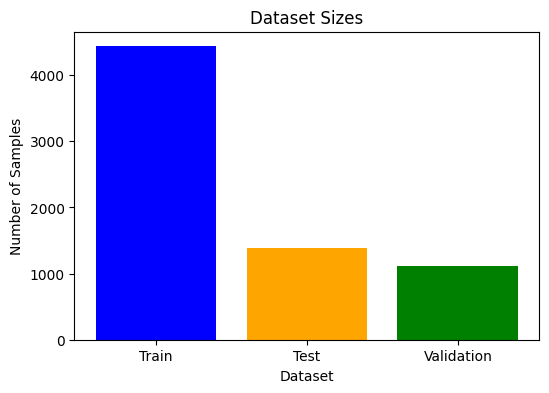

In [30]:
# Plot Dataset sizes
plt.figure(figsize=(6, 4))
plt.bar(dataset_labels, sizes, color=['blue', 'orange', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Dataset Sizes')
plt.show()

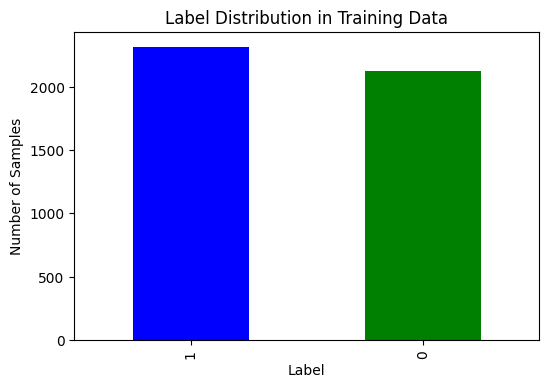

In [31]:
# Data Visualization - Label-wise Split in Train Data
label_counts = pd.Series(y_train).value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Label Distribution in Training Data')
plt.show()

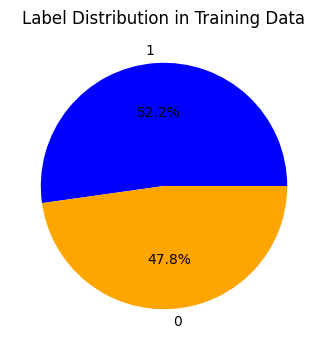

In [32]:
# Plot Label distribution (Pie Chart)
plt.figure(figsize=(6, 4))
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.ylabel('')
plt.title('Label Distribution in Training Data')
plt.show()

In [ ]:
# Define the GRU model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GRU(294, return_sequences=True))
model.add(GRU(254, return_sequences=True))
model.add(Dense(102, activation='relu'))
model.add(GRU(194, return_sequences=True))
model.add(GRU(194))
model.add(Dense(192, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(152, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

new_text = "This new restaurant is a real gem, NOT."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

Epoch 1/10
87/87 [==============================] - 18s 107ms/step - loss: 0.4342 - accuracy: 0.8092 - val_loss: 0.2721 - val_accuracy: 0.8874
Epoch 2/10
87/87 [==============================] - 6s 70ms/step - loss: 0.2120 - accuracy: 0.9192 - val_loss: 0.2406 - val_accuracy: 0.9019
Epoch 3/10
87/87 [==============================] - 4s 46ms/step - loss: 0.1019 - accuracy: 0.9639 - val_loss: 0.2954 - val_accuracy: 0.8947
Epoch 4/10
87/87 [==============================] - 4s 52ms/step - loss: 0.0609 - accuracy: 0.9791 - val_loss: 0.3792 - val_accuracy: 0.8882
Epoch 5/10
44/44 [==============================] - 0s 10ms/step - loss: 0.2406 - accuracy: 0.9019
Test Loss: 0.2406, Accuracy: 0.9019
44/44 [==============================] - 1s 9ms/step
F1 Score (weighted): 0.9018
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       648
           1       0.90      0.92      0.91       738

    accuracy                   

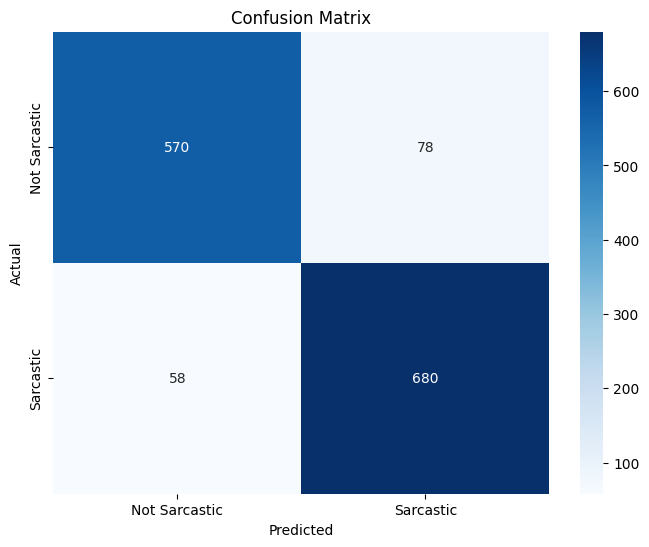

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **BLSTM** : Bidirectional Long Short-Term Memory

In [42]:
max_len = 100
vocab_size = 10000
embedding_dim = 128

texts = df['Tweet'].astype(str)
labels = df['Sarcasm'].astype(int)

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(236, return_sequences=True)))
model.add(Bidirectional(LSTM(228)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=164, validation_data=(X_test, y_test), callbacks=[early_stopping])

y_pred = (model.predict(X_test) > 0.5).astype("int32")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

new_text = "This new restaurant is a real gem, NOT."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")


Epoch 1/20
34/34 [==============================] - 22s 294ms/step - loss: 0.5138 - accuracy: 0.7576 - val_loss: 0.3526 - val_accuracy: 0.8752
Epoch 2/20
34/34 [==============================] - 6s 189ms/step - loss: 0.2704 - accuracy: 0.8927 - val_loss: 0.2698 - val_accuracy: 0.8831
Epoch 3/20
34/34 [==============================] - 7s 197ms/step - loss: 0.1269 - accuracy: 0.9527 - val_loss: 0.3181 - val_accuracy: 0.8939
Epoch 4/20
34/34 [==============================] - 6s 179ms/step - loss: 0.0583 - accuracy: 0.9802 - val_loss: 0.3544 - val_accuracy: 0.8961
Epoch 5/20
44/44 [==============================] - 3s 19ms/step
F1 Score (weighted): 0.8832
1/1 [==============================] - 0s 30ms/step
This text is predicted to be sarcastic.


In [43]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

44/44 [==============================] - 1s 16ms/step
F1 Score (weighted): 0.8832
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       648
           1       0.90      0.87      0.89       738

    accuracy                           0.88      1386
   macro avg       0.88      0.88      0.88      1386
weighted avg       0.88      0.88      0.88      1386



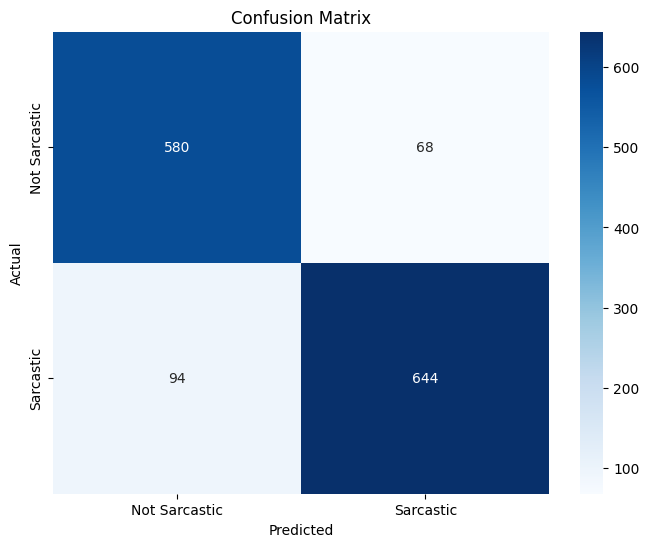

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# CNN : Convolutional Neural network

In [39]:
# Parameters
max_len = 100
vocab_size = 10000
embedding_dim = 128
filter_sizes = [3, 4, 5]
num_filters = 64
dropout_rate = 0.5
l2_lambda = 0.01

# Prepare the data
texts = df['Tweet']
labels = df['Sarcasm']

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

padded_sequences = pad_sequences(sequences, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(vocab_size, embedding_dim, input_length=max_len)(input_layer)

conv_layers = []
for filter_size in filter_sizes:
    conv_layer = Conv1D(num_filters, filter_size, activation='tanh', padding='same')(embedding_layer)
    gated_conv_layer = Conv1D(num_filters, filter_size, activation='sigmoid', padding='same')(conv_layer)
    drop_layer = Dropout(dropout_rate)(gated_conv_layer)
    pooled_layer = GlobalMaxPooling1D()(drop_layer)
    conv_layers.append(pooled_layer)

merged_layer = Concatenate()(conv_layers)

# Add additional dense and dropout layers
dense_layer1 = Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda))(merged_layer)
dropout_layer1 = Dropout(dropout_rate)(dense_layer1)

# Add an LSTM layer
lstm_layer = Bidirectional(LSTM(64, return_sequences=False))(embedding_layer)

# Concatenate LSTM output with CNN output
concat_layer = Concatenate()([dropout_layer1, lstm_layer])

# Final dense layers
dense_layer2 = Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda))(concat_layer)
dropout_layer2 = Dropout(dropout_rate)(dense_layer2)
output_layer = Dense(1, activation='sigmoid')(dropout_layer2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Predict new text
new_text = "This new restaurant is a real gem, NOT."  # Replace with your text
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")


Epoch 1/20
174/174 [==============================] - 24s 76ms/step - loss: 1.6129 - accuracy: 0.6838 - val_loss: 0.7745 - val_accuracy: 0.8680
Epoch 2/20
174/174 [==============================] - 8s 47ms/step - loss: 0.5353 - accuracy: 0.8975 - val_loss: 0.4402 - val_accuracy: 0.8882
Epoch 3/20
174/174 [==============================] - 3s 20ms/step - loss: 0.2580 - accuracy: 0.9553 - val_loss: 0.3775 - val_accuracy: 0.8817
Epoch 4/20
174/174 [==============================] - 3s 18ms/step - loss: 0.1457 - accuracy: 0.9771 - val_loss: 0.3591 - val_accuracy: 0.8802
Epoch 5/20
174/174 [==============================] - 4s 21ms/step - loss: 0.0934 - accuracy: 0.9868 - val_loss: 0.3509 - val_accuracy: 0.8889
Epoch 6/20
174/174 [==============================] - 6s 35ms/step - loss: 0.0695 - accuracy: 0.9903 - val_loss: 0.3757 - val_accuracy: 0.8947
Epoch 7/20
174/174 [==============================] - 3s 20ms/step - loss: 0.0567 - accuracy: 0.9910 - val_loss: 0.3993 - val_accuracy: 0.881

In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

44/44 [==============================] - 0s 5ms/step
F1 Score (weighted): 0.8890
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       648
           1       0.93      0.86      0.89       738

    accuracy                           0.89      1386
   macro avg       0.89      0.89      0.89      1386
weighted avg       0.89      0.89      0.89      1386



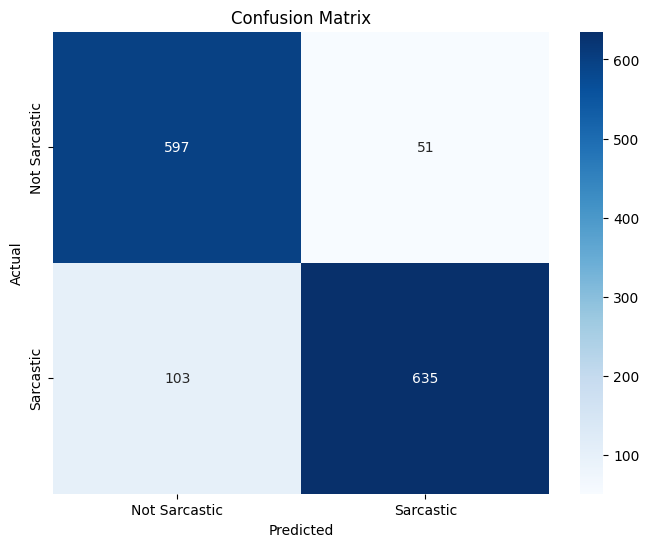

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **RNN** : Recurrent Neural network

In [50]:
max_len = 100
vocab_size = 10000
embedding_dim = 128

texts = df['Tweet'].astype(str).tolist()
labels = df['Sarcasm'].astype(int).tolist()

# Tokenization and Padding
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Define the RNN Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(SimpleRNN(128, return_sequences=False))  # SimpleRNN layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Predict on new text
new_text = "This new restaurant is a real gem, NOT."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)

if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")


Epoch 1/5
174/174 [==============================] - 40s 214ms/step - loss: 0.4436 - accuracy: 0.7913 - val_loss: 0.2736 - val_accuracy: 0.8846
Epoch 2/5
174/174 [==============================] - 30s 172ms/step - loss: 0.1361 - accuracy: 0.9497 - val_loss: 0.2932 - val_accuracy: 0.8838
Epoch 3/5
174/174 [==============================] - 17s 98ms/step - loss: 0.0597 - accuracy: 0.9807 - val_loss: 0.3537 - val_accuracy: 0.8615
Epoch 4/5
174/174 [==============================] - 34s 193ms/step - loss: 0.0301 - accuracy: 0.9922 - val_loss: 0.3375 - val_accuracy: 0.8867
Epoch 5/5
44/44 [==============================] - 0s 10ms/step - loss: 0.3854 - accuracy: 0.8846
Loss: 0.3854, Accuracy: 0.8846
1/1 [==============================] - 0s 126ms/step
This text is predicted to be sarcastic.


In [51]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

44/44 [==============================] - 0s 10ms/step
F1 Score (weighted): 0.8846
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       648
           1       0.89      0.89      0.89       738

    accuracy                           0.88      1386
   macro avg       0.88      0.88      0.88      1386
weighted avg       0.88      0.88      0.88      1386



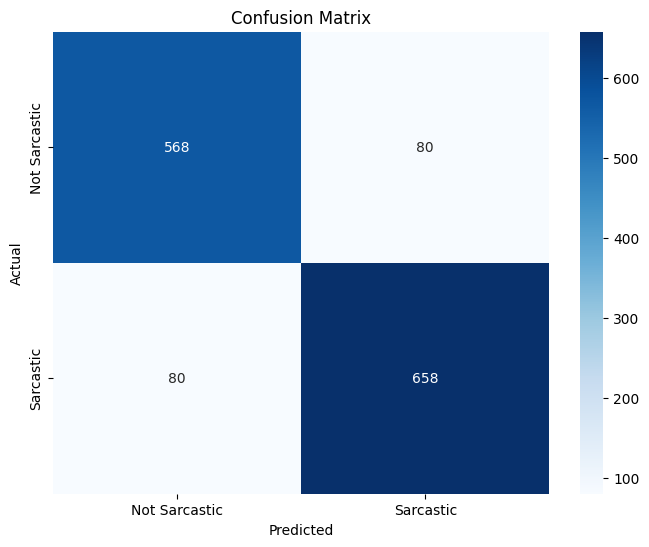

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Conclusion**:

### **Upload the dataset**
### **Preprocessed the dataset** : Remove urls, #, @, etc and check for null value or duplicate value or replace Emoji with its meaningful text.

### Merge Two Datasets

### Applied Word Tokenization to the 'Tweet' column

### **Trained and Evaluate the Model**:

Tried various deep learning models and found GRU to have the best performance among them.

**Accuracy of different deep learning models**:


*   GRU: 90.19%
*   BLSTM: 88.32%
*   CNN: 88.89%
*   RNN: 88.46%





